In [1]:
# Importacion de Librerias a usar.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Metricas que nos diran que tan bien estamos clasificando cada uno de las CLASES.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score


In [2]:
# Importacion de los datos. 

df = pd.read_csv('data.csv')
df.head()

,id,start_date,end_date,lat,lon,l2,l3,rooms,bedrooms,bathrooms,currency,property_type,geometry,target,bathdrooms
0,861131,2020-12-14,9999-12-31,6.203000,-75.572000,Antioquia,Medellín,4.0,4.0,4.0,COP,Casa,POINT (-75.572 6.203),1,4.0
1,200972,2020-09-16,2021-05-14,4.722748,-74.073115,Cundinamarca,Bogotá D.C,3.0,3.0,2.0,COP,Apartamento,POINT (-74.0731146 4.7227485),0,2.0
2,554622,2020-08-19,2020-08-20,4.709000,-74.030000,Cundinamarca,Bogotá D.C,2.0,2.0,2.0,COP,Casa,POINT (-74.03 4.709),0,2.0
3,540321,2020-11-23,2020-11-30,NaN,NaN,Santander,Bucaramanga,1.0,1.0,1.0,COP,Otro,POINT EMPTY,1,1.0
4,448920,2020-10-06,2020-10-07,NaN,NaN,Antioquia,Medellín,2.0,2.0,2.0,COP,Apartamento,POINT EMPTY,0,2.0


In [3]:
# El primer modelo, solo se usara las columnas de 'rooms', 'bedrooms' y 'bathrooms' que se cree que son 
# de gran importancia para la prediccion. 

df_train = df[['rooms', 'bedrooms', 'bathrooms', 'target']]
df_train.head()

,rooms,bedrooms,bathrooms,target
0,4.0,4.0,4.0,1
1,3.0,3.0,2.0,0
2,2.0,2.0,2.0,0
3,1.0,1.0,1.0,1
4,2.0,2.0,2.0,0


In [4]:
from sklearn import preprocessing

# Escalamiento de las features que ayudaran a predecir.
data = preprocessing.StandardScaler().fit_transform(df_train.iloc[:, :-1])
data.shape




(197549, 3)

In [5]:
# Target, sera la variable a predecir.
objetivo = df_train.iloc[:,-1]


## Datos Desbalanceados

##### Vemos la proporcion de los datos desbalanceados

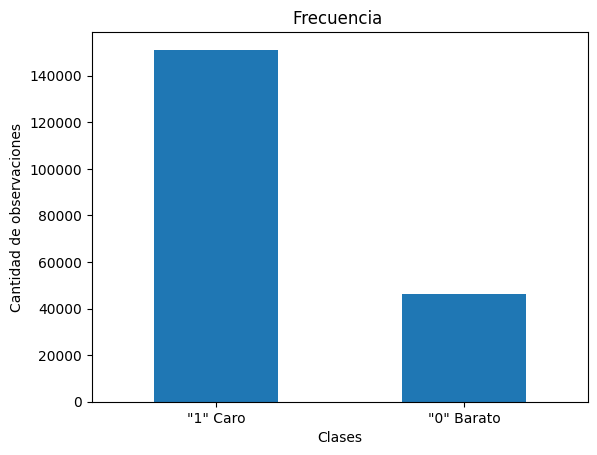

In [6]:
count_classes = pd.value_counts(df_train['target'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.xticks(range(2), {'"1" Caro', '"0" Barato'})
plt.title('Frecuencia ')
plt.xlabel('Clases')
plt.ylabel('Cantidad de observaciones')
plt.show()


#### Como estamos ante un modelo desbalanceado: Usare la estrategia de Compensación por penalización.
- Usamos el parametro adicional en el modelo de Regresion Logistica en donde se indica weight = 'balanced' y con esto el algoritmo se encargará de equilibrar a la clase minoritaria durante el entrenamiento.

In [7]:
# Subdividimos el set de entrenaminto. 
X_train, X_test, y_train, y_test = train_test_split(data, objetivo, train_size=0.7, random_state = 42)


# Vemos cuantos registros son de clase 1 y clase 0. 
y_train.value_counts()

0    105714
1     32570
Name: target, dtype: int64

In [8]:
def modelo_con_balanceo(X_train, y_train):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver='newton-cg',class_weight='balanced')
    clf.fit(X_train, y_train)
    return clf

In [9]:
model = modelo_con_balanceo(X_train, y_train)
y_train_predict = model.predict(X_train)


# Matriz de confusion de los sub datos de entrenamiento.
matriz = confusion_matrix( y_train, y_train_predict, labels = [1,0])

print(matriz)

[[24344  8226]
 [33085 72629]]


Accuracy: 0.7012597263602441
Recall: 0.7474362910653976


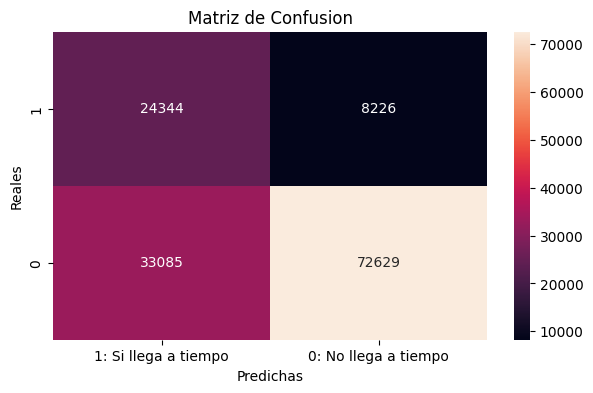

' Obs: Vemos que confirma el codigo anterior, que habia:\n        32570 registros reales para la clase 1\n        105714 registros reales para la clase 0  '

In [10]:
# Graficando la matriz de confusión:    

matriz = pd.DataFrame(matriz, index = [i for i in ['1', '0']],
                  columns = [i for i in ['1: Si llega a tiempo', '0: No llega a tiempo']])

plt.figure(figsize = (7,4))
sns.heatmap(matriz, annot=True, fmt="d")
plt.title('Matriz de Confusion')
plt.xlabel('Predichas')
plt.ylabel('Reales')

accuracy = accuracy_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')


plt.show()



''' Obs: Vemos que confirma el codigo anterior, que habia:
        32570 registros reales para la clase 1
        105714 registros reales para la clase 0  '''

#### Ahora vemos como se comporta para todo el set de entrenamiento

In [11]:

modelo_train_completo = modelo_con_balanceo(data, objetivo)
objetivo_predict = modelo_train_completo.predict(data)


# Matriz de confusion de los sub datos de entrenamiento.
matriz_completo = confusion_matrix( objetivo, objetivo_predict, labels = [1,0])

print(matriz_completo)

[[ 34643  11715]
 [ 47639 103552]]


Accuracy: 0.6995479602528992
Recall: 0.747292808145304


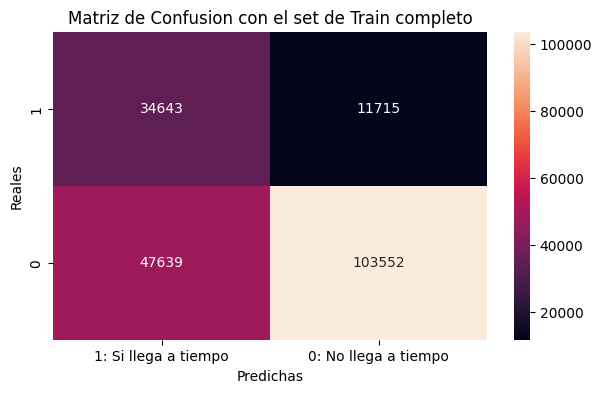

In [12]:
# Graficando la matriz de confusión:    

matriz_completo = pd.DataFrame(matriz_completo, index = [i for i in ['1', '0']],
                  columns = [i for i in ['1: Si llega a tiempo', '0: No llega a tiempo']])

plt.figure(figsize = (7,4))
sns.heatmap(matriz_completo, annot=True, fmt="d")
plt.title('Matriz de Confusion con el set de Train completo')
plt.xlabel('Predichas')
plt.ylabel('Reales')

accuracy = accuracy_score(objetivo, objetivo_predict)
recall = recall_score(objetivo, objetivo_predict)
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')


plt.show()

### Ahora se probara con el dataset de prueba, se tendra que hacer todo el analisis previo que se hizo para el test de entrenamiento
- Pero como en este modelo se enfoca en 3 columnas especificas, solo se completara los valores nulos de dichas columnas para no tener que limpiar todo el dataframe y luego no tener que usar las demas columnas.

In [13]:
df = pd.read_csv('properties_colombia\properties_colombia_test.csv')
df = df[['rooms', 'bedrooms', 'bathrooms', 'property_type']]
df.head()

,rooms,bedrooms,bathrooms,property_type
0,3.0,3.0,3.0,Casa
1,NaN,NaN,3.0,Apartamento
2,NaN,NaN,1.0,Casa
3,NaN,NaN,NaN,Lote
4,NaN,NaN,2.0,Casa


#### Analisis de las columnas: 'rooms', 'bedrooms', 'bathrooms'

- Analizamos estas columnas en conjunto, porque podemos encontrar una relación entre ellas. Así que podemos ir completando valores faltantes.

In [14]:
# PRIMER CASO: Cuando la columna 'property_type' es de tipo 'Lote', completamos  los valores NaN 
#  con ceros a las columnas 'rooms', 'bedroms' y 'bathrooms' ya que tiene sentido que si solo es 
#  Lote no hay nada construido. 


In [15]:
df['rooms'] = np.where(df.property_type == 'Lote', 0, df.rooms )
df['bedrooms'] = np.where(df.property_type == 'Lote', 0, df.bedrooms )
df['bathrooms'] = np.where(df.property_type == 'Lote', 0, df.bathrooms )

# Se comprueba que se hizo correctamente el cambio
df[df.property_type == 'Lote']

,rooms,bedrooms,bathrooms,property_type
3,0.0,0.0,0.0,Lote
12,0.0,0.0,0.0,Lote
32,0.0,0.0,0.0,Lote
53,0.0,0.0,0.0,Lote
68,0.0,0.0,0.0,Lote
...,...,...,...,...
65830,0.0,0.0,0.0,Lote
65840,0.0,0.0,0.0,Lote
65841,0.0,0.0,0.0,Lote
65842,0.0,0.0,0.0,Lote


In [16]:
# Primero se ve la cantidad de registros que tienen las columnas 'bedrooms' y 'bathrooms' iguales. 
# Sin contar los ceros(ya que eran los datos nulos que se completo con ceros. )

df[(df.bedrooms == df.bathrooms) & (df.bedrooms != 0.00)]

,rooms,bedrooms,bathrooms,property_type
0,3.0,3.0,3.0,Casa
14,3.0,3.0,3.0,Casa
52,1.0,1.0,1.0,Apartamento
61,NaN,5.0,5.0,Casa
119,3.0,3.0,3.0,Casa
...,...,...,...,...
65732,2.0,2.0,2.0,Apartamento
65738,NaN,2.0,2.0,Apartamento
65779,2.0,2.0,2.0,Apartamento
65804,2.0,2.0,2.0,Apartamento


In [17]:
# Vemos la cantidad de valores nulos que tiene la columna 'rooms' cuando las columnas 'bedrooms' y 'bathrooms' son iguales. 
df[(df['bedrooms']== df['bathrooms'])  & (df['rooms'].isnull()) ]

,rooms,bedrooms,bathrooms,property_type
61,NaN,5.0,5.0,Casa
150,NaN,3.0,3.0,Casa
172,NaN,2.0,2.0,Apartamento
268,NaN,2.0,2.0,Apartamento
385,NaN,2.0,2.0,Apartamento
...,...,...,...,...
65537,NaN,2.0,2.0,Apartamento
65662,NaN,3.0,3.0,Apartamento
65675,NaN,1.0,1.0,Apartamento
65738,NaN,2.0,2.0,Apartamento


In [18]:
# Vemos la cantidad de registros que cumplen que las columnas 'rooms', 'bedrooms' y 'bathrooms' son iguales. 
df[ (df['rooms'] == df['bedrooms']) & ( df['bedrooms'] == df['bathrooms']) & (df.rooms != 0)]


,rooms,bedrooms,bathrooms,property_type
0,3.0,3.0,3.0,Casa
14,3.0,3.0,3.0,Casa
52,1.0,1.0,1.0,Apartamento
119,3.0,3.0,3.0,Casa
201,2.0,2.0,2.0,Apartamento
...,...,...,...,...
65550,2.0,2.0,2.0,Apartamento
65598,3.0,3.0,3.0,Apartamento
65732,2.0,2.0,2.0,Apartamento
65779,2.0,2.0,2.0,Apartamento


In [19]:
# Vemos la cantidad de registros que cumplira nuestra condicion
aux = (df.bathrooms == df.bedrooms)&(df.rooms.isnull())
aux.value_counts()

False    64712
True      1138
dtype: int64

In [20]:
# Modificando los valores Nulos de la columna 'rooms'. 
df.rooms = np.where(aux, df.bedrooms, df.rooms)

In [21]:
# Comprobamos que se modifico correctamente, ya no habra valores nulos en la columna 'rooms' que tenian esta condicion. 
a = (df.bathrooms == df.bedrooms)&(df.rooms.isnull())
a.value_counts()

False    65850
dtype: int64

In [22]:
# Seguimos actualizando para ver como estan los registros. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65850 entries, 0 to 65849
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rooms          15928 non-null  float64
 1   bedrooms       18962 non-null  float64
 2   bathrooms      57743 non-null  float64
 3   property_type  65850 non-null  object 
dtypes: float64(3), object(1)
memory usage: 2.0+ MB


In [23]:
# Vemos los demas valores nulos de la columna 'rooms'
df[df.rooms.isnull()]

,rooms,bedrooms,bathrooms,property_type
1,NaN,NaN,3.0,Apartamento
2,NaN,NaN,1.0,Casa
4,NaN,NaN,2.0,Casa
5,NaN,NaN,3.0,Casa
6,NaN,NaN,2.0,Apartamento
...,...,...,...,...
65844,NaN,NaN,2.0,Apartamento
65846,NaN,NaN,1.0,Apartamento
65847,NaN,NaN,2.0,Otro
65848,NaN,NaN,2.0,Apartamento


In [24]:

# Vemos la cantidad de registros que cumple esta condición. 
# Tener datos no nulos en 'rooms' y tener datos diferentes entre 'bedrooms' y 'bathrooms', ya que los iguales ya se habia analizado. 
df[~(df.rooms.isnull()) & (df.bedrooms != df.bathrooms)]

,rooms,bedrooms,bathrooms,property_type
8,3.0,3.0,NaN,Apartamento
26,9.0,9.0,10.0,Casa
36,3.0,3.0,NaN,Casa
69,16.0,16.0,NaN,Otro
82,2.0,2.0,NaN,Apartamento
...,...,...,...,...
65809,3.0,3.0,NaN,Apartamento
65824,6.0,6.0,3.0,Casa
65828,3.0,3.0,NaN,Apartamento
65837,3.0,3.0,NaN,Apartamento


In [25]:
aux = df[~(df.rooms.isnull()) & (df.bedrooms != df.bathrooms)]

(aux.rooms ==  aux.bedrooms).value_counts()

# Se ve que la cantidad de valores que son iguales 'rooms' y 'bedrooms' es grande, casi en su totalidad, por lo tanto es una buena 
# decision completar los valores nulos que se tenia de la columna 'rooms' con el mismo valor de la columna 'bedrooms'

True     8043
False      22
dtype: int64

In [26]:
# Modificando los valores Nulos de la columna 'rooms'. 
df.rooms = np.where(df.rooms.isnull(), df.bedrooms, df.rooms)

In [27]:

# Vemos que aun hay registros que tienen en los 3 campos (rooms, bedrooms, bathrooms) con valores nulos. 
aux = df[df.rooms.isnull() & df.bedrooms.isnull() & df.bathrooms.isnull()]

aux

,rooms,bedrooms,bathrooms,property_type
41,NaN,NaN,NaN,Casa
79,NaN,NaN,NaN,Otro
87,NaN,NaN,NaN,Casa
160,NaN,NaN,NaN,Otro
204,NaN,NaN,NaN,Otro
...,...,...,...,...
65725,NaN,NaN,NaN,Otro
65758,NaN,NaN,NaN,Local comercial
65796,NaN,NaN,NaN,Otro
65803,NaN,NaN,NaN,Otro


In [28]:
# Vemos en cuantas caracteristicas tenemos que calcularle el promedio. 
aux.property_type.value_counts()

Otro               1037
Casa                302
Local comercial     246
Apartamento         156
Oficina             141
Finca                17
Parqueadero           4
Name: property_type, dtype: int64

In [29]:
def calculo_promedio_rbb( caracteristica):
    ''' Calcula el promedio de las 'rooms', 'bedrooms' y 'bathrooms'  sin tener en cuenta los valores nulos y los ceros. 
    Devuelve un lista con los valores redondeados '''

    aux = df[df.property_type == caracteristica]
    
    rooms_mean = aux[aux.rooms !=0 ].rooms.mean()
    bedrooms_mean = aux[aux.bedrooms !=0 ].bedrooms.mean()
    bathrooms_mean = aux[aux.bathrooms !=0 ].bathrooms.mean()

    return [rooms_mean.round(), bedrooms_mean.round(), bathrooms_mean.round()]

In [30]:
for i in aux.property_type.unique():
    
    lista_promedio = calculo_promedio_rbb('Casa')

    # completo con estos valores encontrados a los valores nulos. 
    

    df['rooms'] = np.where((df.rooms.isnull() & df.bedrooms.isnull() & df.bathrooms.isnull()), lista_promedio[0], df.rooms )
    df['bedrooms'] = np.where((df.rooms.isnull() & df.bedrooms.isnull() & df.bathrooms.isnull()), lista_promedio[1], df.bedrooms )
    df['bathrooms'] = np.where((df.rooms.isnull() & df.bedrooms.isnull() & df.bathrooms.isnull()), lista_promedio[2], df.bathrooms )



In [31]:
# Comprobamos que ya no hay valores nulos en los 3 campos. (Valores nulos por separado todavia hay)
df[df.rooms.isnull() & df.bedrooms.isnull() & df.bathrooms.isnull()]

,rooms,bedrooms,bathrooms,property_type


In [32]:
# Los demas valores nulos, se completara con el mismo valor que tiene alguna otra columna, es decir los 3 columnas tendran el mismo valor. 
df[df.rooms.isnull() & df.bedrooms.isnull()]

,rooms,bedrooms,bathrooms,property_type
1,NaN,NaN,3.0,Apartamento
2,NaN,NaN,1.0,Casa
4,NaN,NaN,2.0,Casa
5,NaN,NaN,3.0,Casa
6,NaN,NaN,2.0,Apartamento
...,...,...,...,...
65844,NaN,NaN,2.0,Apartamento
65846,NaN,NaN,1.0,Apartamento
65847,NaN,NaN,2.0,Otro
65848,NaN,NaN,2.0,Apartamento


In [33]:
# Se modifica las columnas.
df['rooms'] = np.where((df.rooms.isnull() & df.bedrooms.isnull()), df.bathrooms, df.rooms )
df['bedrooms'] = np.where((df.rooms.isnull() & df.bedrooms.isnull()), df.bathrooms, df.bedrooms )


In [34]:
# Comprobamo que ya no hay valores nulos en las 2 columnas en el mismo registro. 
df[df.rooms.isnull() & df.bedrooms.isnull()]

,rooms,bedrooms,bathrooms,property_type


In [35]:
# Ahora se hace lo mismo para esta condicion, se pondra del mismo valor las 3 columnas.
df[df.bedrooms.isnull() & df.bathrooms.isnull()]

,rooms,bedrooms,bathrooms,property_type
41,4.0,NaN,NaN,Casa
79,4.0,NaN,NaN,Otro
87,4.0,NaN,NaN,Casa
160,4.0,NaN,NaN,Otro
204,4.0,NaN,NaN,Otro
...,...,...,...,...
65725,4.0,NaN,NaN,Otro
65758,4.0,NaN,NaN,Local comercial
65796,4.0,NaN,NaN,Otro
65803,4.0,NaN,NaN,Otro


In [36]:
# Se modifica las columnas.
df['bedrooms'] = np.where((df.bedrooms.isnull() & df.bathrooms.isnull()), df.rooms, df.bedrooms )
df['bathrooms'] = np.where((df.bedrooms.isnull() & df.bathrooms.isnull()), df.rooms, df.bathrooms )


In [37]:
# Vemos los nulos de la columna 'bedrooms'
df[df.bedrooms.isnull()]

,rooms,bedrooms,bathrooms,property_type
1,3.0,NaN,3.0,Apartamento
2,1.0,NaN,1.0,Casa
4,2.0,NaN,2.0,Casa
5,3.0,NaN,3.0,Casa
6,2.0,NaN,2.0,Apartamento
...,...,...,...,...
65844,2.0,NaN,2.0,Apartamento
65846,1.0,NaN,1.0,Apartamento
65847,2.0,NaN,2.0,Otro
65848,2.0,NaN,2.0,Apartamento


In [38]:
# Completamos los nulos de la columna 'bedrooms' con el mismo valor que tiene la columna 'rooms'

df['bedrooms'] = np.where(df.bedrooms.isnull(), df.rooms, df.bedrooms )


In [39]:
# Ahora completamos los valores nulos de la columna 'bathrooms'
df[df.bathrooms.isnull()]

,rooms,bedrooms,bathrooms,property_type
8,3.0,3.0,NaN,Apartamento
36,3.0,3.0,NaN,Casa
41,4.0,4.0,NaN,Casa
69,16.0,16.0,NaN,Otro
79,4.0,4.0,NaN,Otro
...,...,...,...,...
65809,3.0,3.0,NaN,Apartamento
65823,4.0,4.0,NaN,Otro
65828,3.0,3.0,NaN,Apartamento
65837,3.0,3.0,NaN,Apartamento


In [40]:
# Completamos los nulos de la columna 'bedrooms' con el mismo valor que tiene la columna 'rooms'

df['bathrooms'] = np.where(df.bathrooms.isnull(), df.bedrooms, df.bathrooms )

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65850 entries, 0 to 65849
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rooms          65850 non-null  float64
 1   bedrooms       65850 non-null  float64
 2   bathrooms      65850 non-null  float64
 3   property_type  65850 non-null  object 
dtypes: float64(3), object(1)
memory usage: 2.0+ MB


In [42]:
# Solo se necesitara el las 3 columnas de rooms, bedrooms y bathrooms

df = df[['rooms', 'bedrooms', 'bathrooms']]

### Prediccion de con el set de test. 

In [43]:
# Escalamiento de las features que ayudaran a predecir.
data = preprocessing.StandardScaler().fit_transform(df)
print(data.shape)

(65850, 3)


In [44]:
# Uso el modelo anterior(el que se calculo para el set de train completo)

test_predict = modelo_train_completo.predict(data)
test_predict

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
# Exportacion de la prediccion de nuestro modelo
file = pd.DataFrame(test_predict, columns = ['pred'])
file.to_csv('Cvargas24.csv', index = False)